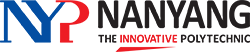

# ITB251 Assignment - Task 1: Sentiment Classification

You are required to build a sentiment classification model predict the sentiment of the review text. Businesses will be able to use this model to predict the sentiment of a new review.

Complete the following sub-tasks:
1.	**Data Understanding**: Examine the dataset
2.	**Data Preparation**: Prepares the data and all necessary pre-processing tasks
3.	**Modelling**: Use different text representation and modelling algorithms
4.	**Evaluation**: Evaluates results from the algorithms and select the best model

For each sub-task, perform the necessary steps and **explain the rationale taken for each step in this Jupyter notebook**. 

**Done by: Zhang Xiang 210896X**

## Import libraries and download the packages

In [1]:
# !pip install langdetect
# !pip install contractions
# !pip install xgboost

import nltk
nltk.download('all')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.stem import PorterStemmer

import pandas as pd
import numpy as np
import string
import re
import matplotlib.pyplot as plt
import seaborn as sns
import contractions
from langdetect import detect
from spellchecker import SpellChecker
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

import torch
import transformers as ppb
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.model_selection import GridSearchCV

import xgboost as xgb

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to C:\Users\Zhang
[nltk_data]    |     Xiang\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to C:\Users\Zhang
[nltk_data]    |     Xiang\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\Zhang Xiang\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\Zhang Xiang\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to C:\Users\Zhang
[nltk_data]    |     Xiang\AppData\Roaming\

[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package mte_teip5 to C:\Users\Zhang
[nltk_data]    |     Xiang\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mte_teip5 is already up-to-date!
[nltk_data]    | Downloading package mwa_ppdb to C:\Users\Zhang
[nltk_data]    |     Xiang\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mwa_ppdb is already up-to-date!
[nltk_data]    | Downloading package names to C:\Users\Zhang
[nltk_data]    |     Xiang\AppData\Roaming\nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Downloading package nombank.1.0 to C:\Users\Zhang
[nltk_data]    |     Xiang\AppData\Roaming\nltk_data...
[nltk_data]    |   Package nombank.1.0 is already up-to-date!
[nltk_data]    | Downloading package nonbreaking_prefixes to
[nltk_data]    |     C:\Users\Zhang Xiang\AppData\Roaming\nltk_data...
[nltk_data]    |   Package nonbreaking_prefixes is already up-to-date!
[nltk_data]    

[nltk_data]    |   Package twitter_samples is already up-to-date!
[nltk_data]    | Downloading package udhr to C:\Users\Zhang
[nltk_data]    |     Xiang\AppData\Roaming\nltk_data...
[nltk_data]    |   Package udhr is already up-to-date!
[nltk_data]    | Downloading package udhr2 to C:\Users\Zhang
[nltk_data]    |     Xiang\AppData\Roaming\nltk_data...
[nltk_data]    |   Package udhr2 is already up-to-date!
[nltk_data]    | Downloading package unicode_samples to C:\Users\Zhang
[nltk_data]    |     Xiang\AppData\Roaming\nltk_data...
[nltk_data]    |   Package unicode_samples is already up-to-date!
[nltk_data]    | Downloading package universal_tagset to
[nltk_data]    |     C:\Users\Zhang Xiang\AppData\Roaming\nltk_data...
[nltk_data]    |   Package universal_tagset is already up-to-date!
[nltk_data]    | Downloading package universal_treebanks_v20 to
[nltk_data]    |     C:\Users\Zhang Xiang\AppData\Roaming\nltk_data...
[nltk_data]    |   Package universal_treebanks_v20 is already up-to

## Read csv file

In [2]:
# Load data in Pandas
df = pd.read_csv('shopping_reviews.csv')

# Show full data view
# pd.set_option('display.max_colwidth', None)

print(df.shape)

# Sample data for testing
# df = df.sample(n=7000, random_state=1)

# print(df.shape)

df.head(2)

(36422, 7)


,Unnamed: 0,review_id,date,name,categories,text,stars
0,15,Af6Jnf8F5xBliuixStWF8g,2019-09-20,"""Soccer Zone""",Shopping;Sporting Goods,I'll admit it. I caught World Cup fever in 20...,4
1,18,j-6-I55-9EiKNGAjoLHx9A,2020-06-30,"""Fye""",Shopping;Books;Mags;Music & Video;Music & DVDs,This store has gone through some management ch...,4


## Data Understanding
Perform the necessary steps and explain the rationale taken here.

### Considerations:

1. Understand the **Data Type & Columns**.
    - Understanding the data types of the columns can assist in identifying any potential errors or issues in the format of the data.
    - Being familiar with the variables and their meanings to help in identifying missing or unnecessary data in the dataset.
    - Identifying and removing irrelevant data. For example, an index column like "Unnamed: 0" that is generated during data export, can help improve the quality of the dataset for analysis.


2. Check for **Missing/Null Values**.
    - It is essential to be aware of the amount of missing data and how to handle it, as it can potentially introduce bias or inaccuracies.


3. Check for **Duplicate Data**
    - Duplicate data is important to identify and remove any wrong information that might skew the results of the analysis. Having duplicate data can cause issues such as:
        - Biased results/Confusion: Frequency of certain values, which can lead to biased results in statistical analysis and machine learning models.
        - Inefficiency: Increase the size of the dataset, which affect the processing time.
        - For example: I will identify duplicate through unique key "review_id" and "text" columns.


4. Check for **Outliers**.        
   - Looking for outliers in the dataset. Outliers can be caused by errors in data collection or measurement, and should be take care appropriately. Reasons to check for outliers:
        - Inaccurate predictions: Outliers can cause a negative impact on the accuracy of predictions made by machine learning models.
        - Data Quality: Handling outliers can improve the overall quality of the data and ensure that the analysis is based on valid and accurate observations.        
        - For example: I will be performing check on outlier in the "stars" column. It supposingly should only contain rating between 1-5. If outlier is identified it will be handled through removal of corresponding row.
    

5. **Identify unecessary columns to remove** for NLP sentiment analysis.
    - Sentiment analysis only require 2 columns: Sentiment and Text.
    - Efficiency: Reduce code runtime.


6. **Evaluate the balance of the data / Data Distribution**.
    - Data balancing can have a significant impact on the performance of machine learning models with an unbalance data. Consequences as below:
        - Bias: Unbalanced data can result in a bias during machine learning model training, as the model will be mainly exposed to the majority class, leading to poor prediction of the minority class.
        - Overfitting: Unbalanced data can also lead to overfitting the model, where the model performs well on the training data but poorly on unseen data.

### Overview of Data Type and Columns

1. **Data Type of each Column**
    - ***Unnamed: 0*** : int64 (Integer)
    - ***review_id*** : object (String)
    - ***date*** : object
    - ***name*** : object
    - ***categories*** : object
    - ***text*** : object
    - ***stars*** : int64


2. **Column Information**
    - ***Unnamed: 0** :<br>Notice that this column is index generated during previous data export. Which provide no meaning for modelling, thus I will consider to remove it.
    >   Additional Info: To remove the index during export we can use 
    > ~~~Python
    > df.to_csv(file.csv, index=False)
    > ~~~
    - ***review_id*** : Unique Key <br>
        > Format: frqyMxnhjFV7xYVGZYssjQ <br>
        > This column will be used to search for duplicate.
    - ***date*** : Date that the review is completed. <br>
        >Format: 2020-08-23
    - ***name*** : Product Name
    - ***categories*** : Categories that product belong. <br>
        > Format: Fashion;Watches; => A product can have multiple categories seperated with a ";" delimiter.
    - ***text*** : Review given by customer. (Feature Selected)
        > - This column will be used to search for duplicate.
        > - Predictor Column
        
        > Text contain:
        > - "\n" that represent next line.
        > - Numeric number and numeric number with character.
        > - URL (http://...)
        > - Email (info@_.com)
        > - Phone Number (this will be removed at the numeric number removal)
        >> Above uses the library: re
        >> ~~~Python
        >> import re
        >> ## REGEX
        >> pattern = r""
        >> remove_ = re.sub(pattern, ' ', doc)
        >> ~~~
        > - Different cases (Uses build-in .lower() function)
        > - Contractions
        >> Using the library: contractions
        >> ~~~Python
        >> import contractions
        >> contractions.fix(doc)
        >> ~~~
        > - Punctuation
        >> Using the library: string
        >> ~~~Python
        >> import string
        >> string.punctuation
        >> ~~~
        > - Stop Words
        >> Using the library: sklearn
        >> ~~~Python
        >> from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
        >> stopwords = set(ENGLISH_STOP_WORDS)
        >> stopwords.remove('not')
        >> ~~~
        > - Spelling Error
        >> Using the library: spellchecker
        >> ~~~Python
        >> from spellchecker import SpellChecker
        >> spell = SpellChecker()
        >> ## Add word to ignore removal
        >> spell.word_frequency.load_words([])
        >> ## Identify unknown word
        >> misspelled = spell.unknown(cleaned_arr)
        >> ~~~
        > - Short Term \ Simple Term
        > - Multiple Languages
        >> Using the library: langdetect
        >> ~~~Python
        >> from langdetect import detect
        >> df['language'] = df['text'].apply(detect)
        >> ~~~
    - ***stars*** : Rating given by customer. (Feature Selected)
        > - Should have rating in range of 1-5 only.
        > - 1 (Worst) ---- 5(Best)
        > - Sentiment will be created base on the star rating. 
        > - Sentiment grouping is done in Data Preparation.
        > - This column will be removed after sentiment is created.

In [3]:
# Overview through first 3 rows
df.head(3)

,Unnamed: 0,review_id,date,name,categories,text,stars
0,15,Af6Jnf8F5xBliuixStWF8g,2019-09-20,"""Soccer Zone""",Shopping;Sporting Goods,I'll admit it. I caught World Cup fever in 20...,4
1,18,j-6-I55-9EiKNGAjoLHx9A,2020-06-30,"""Fye""",Shopping;Books;Mags;Music & Video;Music & DVDs,This store has gone through some management ch...,4
2,46,wCwl4NC1CxkRIAg2RcLzig,2020-09-28,"""By Design""",Home & Garden;Furniture Stores;Shopping,By Design sells funky ultra modern furniture. ...,3


In [4]:
# Overview on information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36422 entries, 0 to 36421
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  36422 non-null  int64 
 1   review_id   36422 non-null  object
 2   date        36422 non-null  object
 3   name        36422 non-null  object
 4   categories  36422 non-null  object
 5   text        36422 non-null  object
 6   stars       36422 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 1.9+ MB


In [5]:
df.dtypes

Unnamed: 0     int64
review_id     object
date          object
name          object
categories    object
text          object
stars          int64
dtype: object

#### Detect Non-English Text

In [6]:
# Create a temporary dataframe that contain text only.
# Exploration is done through looking at csv file directly as well.
text_exploration = df[['text']]
text_exploration.head(2)

,text
0,I'll admit it. I caught World Cup fever in 20...
1,This store has gone through some management ch...


In [7]:
## Create a new column that indicates the language
df['language'] = df['text'].apply(detect)

In [8]:
# Filter text that are not written in english.
language_check = df[df['language'] != 'en']

# Show data
language_check.head(2)

,Unnamed: 0,review_id,date,name,categories,text,stars,language
49,550,CCdXhW61_ADjwIDZpA9Oqw,2019-11-16,"""nah und gut Alsadi""",Grocery;Food;Shopping,Wer hätte das Gedacht?\nEin kleiner feiner Ede...,4,de
83,948,K-XqStinTowqKX7XFfqLMw,2020-03-28,"""korbmayer""",Shopping;Fashion,Hier gibt's Tolle Kindermode und viel Auswahl ...,3,de


In [9]:
print(f'No.of row with text not written in english:',len(language_check), 'rows')

No.of row with text not written in english: 1099 rows


#### Find URL

In [10]:
# Find URL in dataset
# pattern = r'(https?\:.+)|(www\..+)'
pattern = r"https?\S+"
compiled = re.compile(pattern)

url_list = []
for idx in df.index:
    urls = compiled.findall(df['text'][idx])
    if urls:
        url_list.extend(urls)
        
print('URL:', len(url_list))
url_list

URL: 364


['http:\\/\\/www.yelp.com\\/biz_photos\\/XPZT3zLrkLkFSkBVxSsM3w?select=n2ILUoe8xdyTbIowPfNP3Q',
 'http:\\/\\/www.saleevent.ca\\/index.php)',
 'http:\\/\\/www.artomat.org\\/home.html',
 'http:\\/\\/www.dovenetq.net.au\\/~mahayes\\/Graphics\\/YesLogoFullCircle1.jpg',
 'http:\\/\\/www.vinylrecords.ch\\/B\\/BO\\/Boston\\/Boston\\/boston-63.jpg',
 'http:\\/\\/henrikfalck.com\\/blog\\/uploaded_images\\/LedZeppelinLedZeppelinalbumcover-716782.jpg',
 'http:\\/\\/www.yelp.ca\\/biz\\/outer-layer-toronto',
 'http:\\/\\/www.2ndsole.com\\/',
 'http:\\/\\/www.qype.com\\/place\\/171849-Las-Vegas-Premium-Outlets-Las-Vegas)',
 'http:\\/\\/www.vegaspersonalshopper.com\\/forever-21-store-review\\/',
 'http:\\/\\/www.yelp.com\\/biz_photos\\/rw8YDgz69vqdeu-oLR4W8Q?select=APVssPpowbz3Lb0ob4SAUA',
 'http:\\/\\/www.yelp.com\\/biz_photos\\/rw8YDgz69vqdeu-oLR4W8Q?select=iwbx1a-HRGvIR4fm8qHJhQ',
 'http:\\/\\/www.yelp.com\\/biz_photos\\/rw8YDgz69vqdeu-oLR4W8Q?select=Img8wGILm74mjpwVK-AeGA',
 'http:\\/\\/wp.me\\/p

#### Find Email

In [11]:
# Find email in dataset
email_pattern = r"\S*@\S*\s?"

# '\S*@\S*\s?'
compiled = re.compile(email_pattern)

email_list = []
for idx in df.index:
    email = compiled.findall(df['text'][idx])
    if email:
        email_list.extend(email)

print('Email:', len(email_list))
email_list

Email: 254


['info@bohofarmandhome.com.',
 '*@&*& ',
 '@ ',
 '@ ',
 '@wal-mart ',
 '@ ',
 '@ ',
 '@ ',
 '(@ ',
 'Red@28th ',
 '@Fashion ',
 '@ ',
 '@ ',
 's&@*we ',
 '@ ',
 '@ ',
 '@ ',
 '@ ',
 '@ ',
 '@ ',
 '@ ',
 '@ ',
 '@ ',
 '@ ',
 '@ ',
 '@ ',
 '@ ',
 '@ ',
 '@ ',
 'a@@ ',
 '@2:30pm ',
 '@heatherybean, ',
 '@ ',
 '@ ',
 '@ ',
 '@ ',
 'alinda1313@yahoo ',
 '@ ',
 '@ ',
 '@ ',
 '@ ',
 '@ ',
 '@ ',
 '@ ',
 '-@snakesandlattes ',
 '@ ',
 '@ ',
 '@ ',
 '@ ',
 '@ ',
 '@ ',
 '@ ',
 '@ ',
 '@ ',
 '@ ',
 '@ ',
 '[cricket@service-now.com] ',
 '@ ',
 '@ ',
 '@ ',
 '@ ',
 '@ ',
 'store@pintoranch.com ',
 'lasvegas@pintoranch.com. ',
 '@ ',
 'b*@#h, ',
 '@ ',
 '@ ',
 '@ ',
 'P*@&# ',
 '@ ',
 '@ ',
 '@ ',
 '%#$@&!\n',
 '@ ',
 '@ ',
 'footlongs@ ',
 '@ ',
 '@GameDaze2',
 '@ ',
 'info@santannursery.com ',
 '@ ',
 '@ ',
 '@ ',
 '@ ',
 'LOL@the ',
 'kick@$$ ',
 '@Fashion ',
 '@MAC ',
 '@ ',
 '#$@#%".\n',
 '@ ',
 '@ ',
 '@ ',
 '@ ',
 '@walmart ',
 '@ ',
 '@ ',
 '@ ',
 '@ ',
 '@ ',
 '@ ',
 '@ ',
 '@ ',
 '@ ',
 '$

### Check Missing/Null Value

Missing/Null value is not found in all columns

~~~Python
Unnamed: 0    False
review_id     False
date          False
name          False
categories    False
text          False
stars         False
dtype: bool
~~~

In [12]:
# There are no missing value.
print(df.isna().any())

Unnamed: 0    False
review_id     False
date          False
name          False
categories    False
text          False
stars         False
language      False
dtype: bool


In [13]:
print(df.isna().sum())

Unnamed: 0    0
review_id     0
date          0
name          0
categories    0
text          0
stars         0
language      0
dtype: int64


### Check Duplicate Data

- Exact same row: No Duplicate
- review_id: No Duplicate
- text: 10 duplicate text

From the result below, I would believe that review_id a unique key is generated when customer start a survey, as no duplicate found in review_id it is all unique. 

However, there are multiple duplicate found in text column. This could impact the model as it may introduce bias, and prevent the model from learning effectively.

In [14]:
# It shows that there is no duplicate row. Which mean each row is unique.
print(f"Are there duplicated rows? (Exact Same): {df.duplicated().any()}")

# It shows that there is no duplicate in review_id.
print(f"Are there duplicated review_id?: {df.duplicated(subset = ['review_id']).any()}")

# It shows that there is duplicated text.
print(f"Are there duplicated text?: {df.duplicated(subset = ['text']).any()}")

Are there duplicated rows? (Exact Same): False
Are there duplicated review_id?: False
Are there duplicated text?: True


In [15]:
print(f"Count of duplicated rows (Exact Same): {df.duplicated().sum()}")

print(f"Count of duplicated review_id: {df.duplicated(subset = ['review_id']).sum()}")

print(f"Count of duplicated text: {df.duplicated(subset = ['text']).sum()}")

Count of duplicated rows (Exact Same): 0
Count of duplicated review_id: 0
Count of duplicated text: 10


In [16]:
# List all duplicate
df['text'][df.duplicated(subset = ['text'], keep = False)]

1496     I love Sephora.  The associates are always fri...
4267     Union Hills Ace Hardware is really great.. the...
4415     I have to be honest and say I don't really see...
4454     I have to be honest and say I don't really see...
8622     I needed a new home computer & decided to call...
13449    Top Qualität. Top Beratung. Man weiß woran man...
13450    Man fühlt sich im Laden sofort wohl. Begeister...
16718    Too good to be true...because its not true! I ...
17592    Score! When I went over Christmas they were ha...
20561    Union Hills Ace Hardware is really great.. the...
21345    Score! When I went over Christmas they were ha...
21510    I love Sephora.  The associates are always fri...
23959    Too good to be true...because its not true! I ...
27624    I needed a new home computer & decided to call...
31024    really good prices, but sometimes the fruits &...
33060    really good prices, but sometimes the fruits &...
34564    Too good to be true...because its not true! I .

### Check Outlier

No outlier found in 'stars' column. It range kept within the range of 1-5.

If outlier is found I will consider to remove row that consist of that outlier, as it could be a human error that people manually entering data in to the file.

In [17]:
# The range of rating is kept within 1 to 5 only.
check_stars = sorted(df['stars'].unique())

print(check_stars)

[1, 2, 3, 4, 5]


### Identify unecessary columns for Sentiment Analysis

- In sentiment analysis for NLP, it only require 2 pieces of data which is "sentiment" and "text".

- In order to create "sentiment", it require to use the "stars" column. Therefore it will not be remove.

- All the other columns will be removed during Data Preparation

In [18]:
df.head(1)

,Unnamed: 0,review_id,date,name,categories,text,stars,language
0,15,Af6Jnf8F5xBliuixStWF8g,2019-09-20,"""Soccer Zone""",Shopping;Sporting Goods,I'll admit it. I caught World Cup fever in 20...,4,en


### Evaluate the balance of the data / Data Distribution

The distribution of "stars" is not that balance with rating 5 taking up to 34.5% of the dataset and rating 2 taking up 7.3% (about of the dataset

**Conclude: Data is unbalanced**

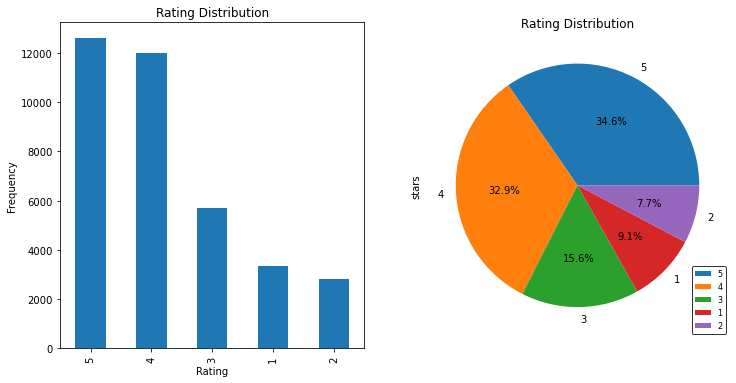

In [19]:
# Create a new figure with 2 subplots
fig, axs = plt.subplots(1,2, figsize=(12,6))

# Count the number of occurrences of each value in the 'stars' column
quality_counts = pd.value_counts(df['stars'])

# Plot the bar chart in the first subplot
quality_counts.plot.bar(ax=axs[0], title="Rating Distribution")

# Plot the counts as a pie chart
quality_counts.plot.pie(ax=axs[1], title="Rating Distribution", autopct='%1.1f%%')

# Add axis labels
axs[0].set_xlabel("Rating")
axs[0].set_ylabel("Frequency")

# Add legends
plt.legend(loc='best', fontsize=8, facecolor='white', edgecolor='black',title_fontsize=12)

# Show the chart
plt.show()

In [20]:
df['stars'].value_counts()

5    12611
4    11984
3     5692
1     3328
2     2807
Name: stars, dtype: int64

## Data Preparation
Perform the necessary steps and explain the rationale taken here.

### Steps:

1. **Remove Non-English Text**
    - With the use of new column 'language', I have decide to remove entire row of record if it is not written in english. 
    - Example: 'French' => 'fr, 'English' => 'en'. 
    - Another option to consider is translating the non-English text into English. This would require significant processing time and effort to review the thousands of rows across the 1000+ columns. Also, we would not know if it translate correctly.
    - Additionally, the Non-English data only represents a small percentage (2.7%) of the entire dataset, and removing it likely would not have a significant impact on the final outcome.

2. **Remove Duplicate Text**
    - Keep the last row of duplicate, if duplicate exist in text column and drop the others.


3. **Remove Unwanted Columns**
    - Drop 'Unnamed: 0','review_id','date','name','categories', 'language'.
    - Only 'text' & 'stars' will be used.


4. **Data Transformation: Create Sentiment**
    - **What are the reasons for choosing to exclude the "neutral" rating (3) and only use "positive":1 (4-5) and "negative":0 (1-2) ratings in sentiment analysis?**

    > - **Simplicity**: Excluding the "neutral" rating (3) and only utilizing "positive" (4-5) and "negative" (1-2) ratings in sentiment analysis can simplify the classification task by turning it into a binary classification problem rather than a multi-class classification problem, making the analysis more simple and easier to understand.
    
    > - **Based on Customer Satisafaction Score (CSAT)**
    > | Sentiment| Rating |
    > |----------|-----|
    > | Positive | 4-5 |
    > | Neutral  | 3   |
    > | Negative | 1-2 |

    > - **Focus on extremes**: By removing the neutral category, it allows to focus on extreme sentiments, either very positive or very negative. Neutral rating might not be well-defined/unclear, which could cause confusion to the training model. 
    
    > - **Business or research context**: More interested in understanding customer complaints or praise rather than neutral feedback, removing neutral rating help to make the results more relevant.

    <!-- - Low Neutral rating accuracy: If neutral rating is not well-defined, it is often the case that neutral rating is the most misclassified among all the other ratings, thus removing them could improve overall accuracy. -->
    
5. **Data Balancing**

    When working with imbalanced datasets, it is important to balance the classes to ensure that the model is **not biased towards the majority class**. 
    
    How can I sample it?

    > - **Under-sampling**: This method involves removing some of the rows from the majority class to balance the dataset.
    
    > - **Over-sampling**: This method involves adding more rows to the minority class to balance the dataset.

    > - **Synthetic Data Generation**: This method involves generating new samples for the minority class. One popular algorithm for this is the Synthetic Minority Over-sampling Technique (SMOTE).
    
    > - Note! I will not be considering to perform Over-Sampling and Over-Sampling method like SMOTE. Looking at the dataset on "Negative" labelled text it amount is more than half lesser than "Positive" labelled text about 1/3 of it. By performing oversampling, it mean that more than half of the data created on "Negative" review is generated by oversampling, which I think is unreasonable and not reliable. This could lead to a very high chances that the data will be overfitted in model training.
    
    > - Also, over-sampling for text it is not commonly used, this is because Text oversampling is a challenging task, where it complexity is more than numeric data. In this model I would want to also focus on identifying both "negative" and  "positive", to understand what customer is looking for improvement and what company is doing good. Therefore, I would not oversample it creating unknown data.
    
    > - Downside of overfitting is that the model will not generalize well to new data, resulting in poor performance on the test set. (More commonly found in oversampling)
 
    > - It can be a challenge to create synthetic text samples that accurately reflect the real distribution of the data
    
    > - However, if undersampling is performed it could lead to loss of important information in the majority "positive" text.
    
    How I will be sampling it?

    - The data balancing is conducted through using the sentiment.

    - Method: **Undersampling**

    - I will perform sampling of 50/50, where 50% is positive and 50% negative, to make it fair in training.

    - **Benefit**: It is known that reducing the class imbalance can improve the performance of some machine learning models, particularly those that are sensitive to class imbalance.

    - **Negative**: It can lead to loss of important information from the majority class, which can negatively impact the performance of the models.

    - Visualisation of bar/pie chart is created to generate more understanding and visual the balancing process.


6. **Text Pre-Processing**
    
    The steps listed must be done in a sequence.
    > 1. **Remove "\n" from text.**
        - From: I'll leave.\nI am here again and spent 20dollar.
        - To: I'll leave. I'm here again and spent 20dollar.
        - Non-Word
    > 2. **Lowercase**
        - Converting all text to lowercase can help standardize the data and prevent the model from treating words with different capitalization as separate words.
        - From: I'll leave. I'm here again and spent.
        - To: i'll leave. i'm here again and spent.
    > 3. **Remove URLs, Email**
        - From : Visit http:\/\/www.saleevent.ca\/index.php, email:  info@bohofarmandhome.com. and call us with  ph. 480 893 0465.
        - To: Visit, email:. and call us with ph..
        -Non-Word
    > 4. **Remove number & number with word.**
        - From: I'll leave. I'm here again and spent 20dollar.
        - To: I'll leave. I'm here again and spent.
        - Non-Word
    > 5. **Expand Contraction.**
        - The use of contractions can make the text less clear, as they can have multiple meanings and can cause confusion or misinterpretation in understanding the text.
        - "I'm" = "I am", if without expanding there will be 3 terms "I'm", "I" and "am" but it mean the same. Which will affect the model.
        - From: i'll leave. i'm here again and spent.
        - To: i will leave. i am here again and spent.
    > 6. **Remove Punctuation**
        - From: i will leave. i am here again and spent.
        - To: i will leave i am here again and spent
    > 7. **Remove Stop Words**
        - From: i will leave i am here again and spent
        - To: [ leave, here, again, spent ]
        - Spelling errors can negatively impact a model's ability to identify sentiment, as they can cause confusion for the model, leading to incorrect predictions. In datasets with many spelling errors, it may be difficult for the model to correctly identify sentiment.
        - Removal of spelling error will be conducted if the spelling error affect much on the performance of the model through testing.
    > 8. **Search for Spelling Error**
        - This function will be looking for english spelling error and update a set with all spelling error for that specific row
        - Example: {dawio}
    > 9. **Remove Spelling Error**
        - From: [again, spent, dawio]
        - To: again spent
    
    **Choose 1 from the 2 methods below: Process of reducing words to their base or root form**
    > 10. **Stemming**
        - Reducing a word to its base form by cutting off the suffixes or prefixes
        - From: The runner was running down the street.
        - To: The run was run down the street.
    > 11. **Lemmatize**
        - Takes into account the context of the word and reduces it to its base form using a dictionary
        - From: I ate an apple.
        - To: I eat an apple.

### Remove Non-English Text

In [21]:
print(df.shape)
df.head(2)

(36422, 8)


,Unnamed: 0,review_id,date,name,categories,text,stars,language
0,15,Af6Jnf8F5xBliuixStWF8g,2019-09-20,"""Soccer Zone""",Shopping;Sporting Goods,I'll admit it. I caught World Cup fever in 20...,4,en
1,18,j-6-I55-9EiKNGAjoLHx9A,2020-06-30,"""Fye""",Shopping;Books;Mags;Music & Video;Music & DVDs,This store has gone through some management ch...,4,en


In [22]:
df = df[df["language"] == "en"]
df.head(2)

,Unnamed: 0,review_id,date,name,categories,text,stars,language
0,15,Af6Jnf8F5xBliuixStWF8g,2019-09-20,"""Soccer Zone""",Shopping;Sporting Goods,I'll admit it. I caught World Cup fever in 20...,4,en
1,18,j-6-I55-9EiKNGAjoLHx9A,2020-06-30,"""Fye""",Shopping;Books;Mags;Music & Video;Music & DVDs,This store has gone through some management ch...,4,en


In [23]:
df.shape

(35323, 8)

### Remove Duplicate Text

In [24]:
df['text'][df.duplicated(subset = ['text'], keep = False)]

1496     I love Sephora.  The associates are always fri...
4267     Union Hills Ace Hardware is really great.. the...
4415     I have to be honest and say I don't really see...
4454     I have to be honest and say I don't really see...
8622     I needed a new home computer & decided to call...
16718    Too good to be true...because its not true! I ...
17592    Score! When I went over Christmas they were ha...
20561    Union Hills Ace Hardware is really great.. the...
21345    Score! When I went over Christmas they were ha...
21510    I love Sephora.  The associates are always fri...
23959    Too good to be true...because its not true! I ...
27624    I needed a new home computer & decided to call...
31024    really good prices, but sometimes the fruits &...
33060    really good prices, but sometimes the fruits &...
34564    Too good to be true...because its not true! I ...
Name: text, dtype: object

In [25]:
df = df.drop_duplicates(subset = ['text'], keep='last')
df.reset_index(drop=True, inplace=True)
df.head(2)

,Unnamed: 0,review_id,date,name,categories,text,stars,language
0,15,Af6Jnf8F5xBliuixStWF8g,2019-09-20,"""Soccer Zone""",Shopping;Sporting Goods,I'll admit it. I caught World Cup fever in 20...,4,en
1,18,j-6-I55-9EiKNGAjoLHx9A,2020-06-30,"""Fye""",Shopping;Books;Mags;Music & Video;Music & DVDs,This store has gone through some management ch...,4,en


In [26]:
df['text'][df.duplicated(subset = ['text'], keep = False)]

Series([], Name: text, dtype: object)

In [27]:
df.shape

(35315, 8)

In [28]:
print(f"Count of duplicated text: {df.duplicated(subset = ['text']).sum()}")

Count of duplicated text: 0


### Remove Unwanted Columns

In [29]:
# Remove unecessary used for analysis
df.drop(columns=['Unnamed: 0','review_id','date','name','categories', 'language'], axis=1, inplace=True)

In [30]:
# Reset index: During testing with smaller sample the index is randomized.
df.reset_index(drop=True, inplace=True)
df.head(2)

,text,stars
0,I'll admit it. I caught World Cup fever in 20...,4
1,This store has gone through some management ch...,4


### Data Transformation: Create Sentiment

In [31]:
def create_sentiment(df):
    # Remove rating 3
    df = df.drop(df[df.stars == 3].index)

    ## Create 2-class classification, rating more than 3 will be group as "positive" (1) else "negative" (0)
    df['sentiment'] = df['stars'].apply(lambda star: "positive" if star > 3 else "negative")

    ## Remove "stars" column after sentiment is created.
    df.drop(columns='stars', axis=1, inplace=True)

    return df

df = create_sentiment(df)

In [32]:
df.head(2)

,text,sentiment
0,I'll admit it. I caught World Cup fever in 20...,positive
1,This store has gone through some management ch...,positive


### Data Balancing

1. The visual below is created with the count of sentiment, serving as a form of validation on checking if data is balance or not using a bar and pie chart.

2. From the visual below it still shows that it is unbalance after sentimenting the "stars" column.

3. I will be performing data balancing with some testing with the methods I have mentioned above in the Data Preparation Section.

positive    23827
negative     5952
Name: sentiment, dtype: int64


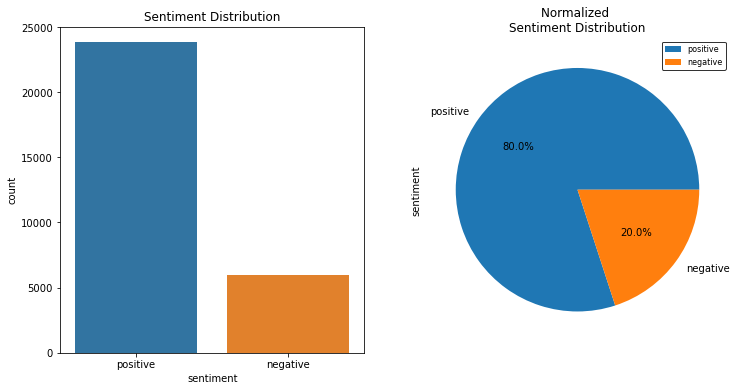

In [33]:
# Create a new figure with 2 subplots
fig, axs = plt.subplots(1,2, figsize=(12,6))

# Count the number of occurrences of each value in the 'sentiment' column
sentiment_counts = pd.value_counts(df['sentiment'])
print(sentiment_counts)

df = df.sort_values(by='text', ascending=False)

sns.countplot(x="sentiment", data=df, ax=axs[0]).set(title='Sentiment Distribution')

# Plot the counts of sentiment as a bar chart
sentiment_counts.plot.pie(ax=axs[1], title="Normalized \nSentiment Distribution", autopct='%1.1f%%')

# Add legends
plt.legend(loc='best', fontsize=8, facecolor='white', edgecolor='black',title_fontsize=12)

# Show the chart
plt.show()

#### Undersampling 

In [34]:
# imlearn RandomUnderSampler
from imblearn.under_sampling import RandomUnderSampler

# Make the sampling 
# sampling_strategy =
rus = RandomUnderSampler(random_state = 42)
X_resampled, y_resampled = rus.fit_resample(df[['text']], df.sentiment)

# Concatenate back to full DataFrame
df = pd.concat([X_resampled, y_resampled], axis=1)
print(df.shape)
df

(11904, 2)


,text,sentiment
0,yes i must agree w\/my fellow yelpers i unders...,negative
1,"yeah, not that good. Who took all the cool shit?",negative
2,wow. This was the single worst experience I ha...,negative
3,"wow, yelp not just for food, I see. \n\nThe ma...",negative
4,wow the customer service is super lacking over...,negative
...,...,...
11899,"Bungalow is fun, unique, always changing. This...",positive
11900,Do you ever have those moments where you find ...,positive
11901,I found La Bella Vita online because they cary...,positive
11902,I had always assumed that the H&M on Chicago's...,positive


negative    5952
positive    5952
Name: sentiment, dtype: int64


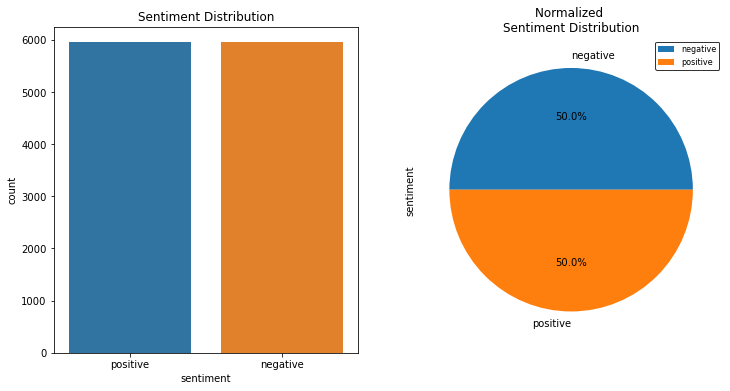

In [35]:
# Create a new figure with 2 subplots
fig, axs = plt.subplots(1,2, figsize=(12,6))

# Count the number of occurrences of each value in the 'sentiment' column
sentiment_counts = pd.value_counts(df['sentiment'])
print(sentiment_counts)

df = df.sort_values(by='text', ascending=False)

sns.countplot(x="sentiment", data=df, ax=axs[0]).set(title='Sentiment Distribution')

# Plot the counts of sentiment as a bar chart
sentiment_counts.plot.pie(ax=axs[1], title="Normalized \nSentiment Distribution", autopct='%1.1f%%')

# Add legends
plt.legend(loc='best', fontsize=8, facecolor='white', edgecolor='black',title_fontsize=12)

# Show the chart
plt.show()

### Text Pre-Processing

In [36]:
df.reset_index(drop=True, inplace=True)

df

,text,sentiment
0,you can't really get much better than Debenham...,positive
1,yes i must agree w\/my fellow yelpers i unders...,negative
2,"yeah, not that good. Who took all the cool shit?",negative
3,yaah for changing hands! easiest the best boo...,positive
4,wow. This was the single worst experience I ha...,negative
...,...,...
11899,$15 general admission to a small gallery. \nSe...,negative
11900,$10 is a great deal specially for us women who...,positive
11901,$$$$$$ for Boho? No thanks! \n\nI've been shop...,negative
11902,#AJs Fine Foods is an excellent source for you...,positive


#### Remove "\n"

In [37]:
# Remove "\n" tag
def remove_BSn(doc):
    # REGEX for "\n" tag
    break_line_tk = nltk.RegexpTokenizer('\\n', gaps=True)
    
    return ' '.join([word for word in break_line_tk.tokenize(doc)])

df['remove_backSlashN'] = df['text'].apply(lambda doc:remove_BSn(doc))

#### Remove Lowercase

In [38]:
df['lowercase'] = df['remove_backSlashN'].apply(lambda doc: doc.lower())

#### Remove URL

In [39]:
def remove_url(doc):
    pattern_url = r"https?\S+"
    
    remove_url = re.sub(pattern_url, ' ', doc)
    
    return remove_url.strip()

df['remove_url'] = df['lowercase'].apply(lambda doc: remove_url(doc))

#### Remove Email

In [40]:
def remove_email(doc):
    pattern_email = r"\S*@\S*\s?"
    remove_email = re.sub(pattern_email, ' ', doc)
    
    return remove_email.strip()

df['remove_email'] = df['remove_url'].apply(lambda doc: remove_email(doc))

#### Remove Number / Number + Text

In [41]:
def remove_number_with_word(doc):
    pattern_alphanumic = "\w*\d\w*"
    
    # Substitude the pattern with a space ' ' 
    # and strip it to prevent word from joining
    remove_alphanumeric = re.sub(pattern_alphanumic, ' ', doc)
    
    return remove_alphanumeric.strip()

df['remove_text_number'] = df['remove_email'].apply(lambda doc: remove_number_with_word(doc))

#### Expand Contraction Word

In [42]:
def expand_contraction(doc):
    
    return contractions.fix(doc)

# Contraction expansion must be conducted before all punctuation is removed.
df['expand_contraction'] = df['remove_text_number'].apply(lambda doc: expand_contraction(doc))

In [43]:
all_words = [word for sent in df.expand_contraction for word in nltk.word_tokenize(sent)]

all_words_frequency = nltk.FreqDist(all_words)
print (all_words_frequency)

# print 20 most frequently occurring words
print (all_words_frequency.most_common(20))

<FreqDist with 39274 samples and 1946765 outcomes>
[('.', 90523), ('the', 75315), (',', 64341), ('i', 61924), ('and', 51685), ('to', 49180), ('a', 44261), ('of', 28375), ('is', 27100), ('not', 23866), ('it', 23848), ('in', 23017), ('for', 20668), ('was', 20362), ('that', 19482), ('you', 18057), ('they', 17800), ('have', 16348), ('my', 16253), ('!', 15365)]


#### Remove Punctuation

In [44]:
def remove_punctuation(doc):
    punctuationfree = "".join([i if i not in string.punctuation else ' ' for i in doc])

    # Return a stripped string without extra empty space
    return punctuationfree.strip()

# Puntuation removal must be conducted after contractions has expanded,
# to avoid making it a spelling error.
df['remove_punctuation'] = df['expand_contraction'].apply(lambda doc:remove_punctuation(doc))

#### Remove Stopword

In [45]:
# from nltk.corpus import stopwords: Not that complete, too little.
from nltk.tokenize import RegexpTokenizer

def remove_stopwords(doc):
    # Create a set of stopwords to remove from review
    stopwords = set(ENGLISH_STOP_WORDS)
    stopwords.remove('not')
  
    # Tokenize it into individual word.
    tokens = nltk.word_tokenize(doc)
    # Perform check for stopwords
    clean_list = [token for token in tokens if not (token in stopwords)]
    
    return clean_list

df['remove_stopwords'] = df['remove_punctuation'].apply(lambda doc:remove_stopwords(doc))

#### Search for Spelling Error

In [46]:
# The default is English (language='en')
spell = SpellChecker()

# Add word that do not want to be classified as spelling error.
spell.word_frequency.load_words([])

# Search spelling error by refering to the library dictionary
def spelling_checker(cleaned_arr):
    
    # Find unknown word from a list of words and create a Set()
    misspelled = spell.unknown(cleaned_arr)
    
    return misspelled

# Create a set of wrong spelling word that are not in dictionary of SpellChecker.
df['wrong_spelling'] = df['remove_stopwords'].apply(lambda arr:spelling_checker(arr))

#### Gather all Spelling Error

In [47]:
# Adding all words with spelling error
wrong_spelling = set()
for i in df.index:
    wrong_spelling.update(df['wrong_spelling'][i])
    
print(sorted(wrong_spelling))
print()
print(f'There are {len(wrong_spelling)} unique misspelled words found.')

['aa', 'aaa', 'aaaaah', 'aaaaand', 'aaaahhh', 'aaaahhhhh', 'aaaalllll', 'aaaalways', 'aaaand', 'aaaarrrrrrrrrggggggggghhh', 'aaah', 'aaand', 'aab', 'aafes', 'aah', 'aahed', 'aahhh', 'aahs', 'aak', 'aam', 'aaron', 'abberation', 'abble', 'abboud', 'abcs', 'abelman', 'abercrombie', 'abita', 'abolutely', 'abouts', 'aboveground', 'abrecrombie', 'abrubt', 'absimal', 'absoloutly', 'absolutley', 'absolutly', 'absprache', 'abuot', 'abviously', 'acanac', 'accesories', 'accessorized', 'accessorizing', 'accessorries', 'accidentaly', 'accidently', 'accomadating', 'accomidated', 'accomodate', 'accomodating', 'accomodation', 'accordions', 'accosts', 'accoutrement', 'accrues', 'acer', 'aceton', 'achat', 'acheive', 'acidland', 'acknowlaged', 'acknowledgeable', 'acknowleges', 'ackward', 'ackwardly', 'aconplshed', 'acp', 'acra', 'acrylics', 'activations', 'activia', 'actuated', 'acually', 'acustom', 'acutally', 'acuvue', 'adamandeve', 'adderley', 'addidas', 'additonal', 'addtional', 'addtl', 'adeline', '

#### Remove Spelling Error

In [48]:
df['deep_spelling_cleansing'] = df['remove_stopwords'].apply(lambda x: [word for word in x if word not in wrong_spelling])

#### Stemming

In [49]:
def stemming(cleaned_arr):
    porter_stemmer = PorterStemmer()
    stem_arr = " ".join([porter_stemmer.stem(word) for word in cleaned_arr])
    
    return stem_arr

df['stemmed'] = df['deep_spelling_cleansing'].apply(lambda arr: stemming(arr))

#### Lemmatization with POS Tagging

In [50]:
def lemmatizing(cleaned_arr):
    lemmatizer = WordNetLemmatizer()

    def pos_tagger(nltk_tag):
        if nltk_tag.startswith('J'):
            return wordnet.ADJ
        elif nltk_tag.startswith('V'):
            return wordnet.VERB
        elif nltk_tag.startswith('N'):
            return wordnet.NOUN
        elif nltk_tag.startswith('R'):
            return wordnet.ADV
        else:         
            return None
        
    pos_tagged = nltk.pos_tag(cleaned_arr)
    
    # wordnet_tagged return something like [('wanted', 'v'), ('love', 'n'), ('even', 'r')]
    wordnet_tagged = list(map(lambda x: (x[0], pos_tagger(x[1])), pos_tagged))
    
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            # if there is no available tag, append the token as it is
            lemmatized_sentence.append(word)
        else:       
            # else use the tag to lemmatize the token to lemmatize the matched tagging with the word
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    lemmatized_sentence = " ".join(lemmatized_sentence)

    return lemmatized_sentence

# Some words like "mixed" adjective seems like unable to be lemmatized with nltk.
df['lemmatized'] = df['deep_spelling_cleansing'].apply(lambda arr: lemmatizing(arr))

#### Compare Length of words Before / After

In [51]:
df['len_before_cleaning'] = df['text'].apply(lambda doc: len(nltk.word_tokenize(doc)))

df['len_after_cleaning'] = df['lemmatized'].apply(lambda doc: len(nltk.word_tokenize(doc)))

In [119]:
print("Total Length Before Cleaning: ", df['len_before_cleaning'].sum())
print("Total length After Cleaning ", df['len_after_cleaning'].sum())

Total Length Before Cleaning:  1959306
Total length After Cleaning  717245


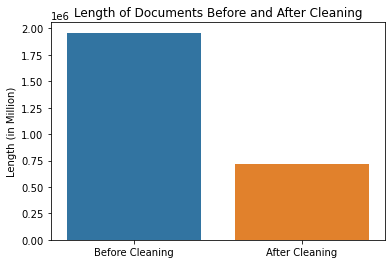

In [121]:
sns.barplot(x=['Before Cleaning','After Cleaning'], y=[df['len_before_cleaning'].sum(), df['len_after_cleaning'].sum()])
plt.ylabel('Length (in Million)')
plt.title('Length of Documents Before and After Cleaning')
plt.show()

In [52]:
df.head(2)

,text,sentiment,remove_backSlashN,lowercase,remove_url,remove_email,remove_text_number,expand_contraction,remove_punctuation,remove_stopwords,wrong_spelling,deep_spelling_cleansing,stemmed,lemmatized,len_before_cleaning,len_after_cleaning
0,you can't really get much better than Debenham...,positive,you can't really get much better than Debenham...,you can't really get much better than debenham...,you can't really get much better than debenham...,you can't really get much better than debenham...,you can't really get much better than debenham...,you cannot really get much better than debenha...,you cannot really get much better than debenha...,"[not, really, better, debenhams, matter, great...","{debenhams, tsuh, playsuit}","[not, really, better, matter, great, selection...",not realli better debenham matter great select...,not really good matter great selection clothes...,131,45
1,yes i must agree w\/my fellow yelpers i unders...,negative,yes i must agree w\/my fellow yelpers i unders...,yes i must agree w\/my fellow yelpers i unders...,yes i must agree w\/my fellow yelpers i unders...,yes i must agree w\/my fellow yelpers i unders...,yes i must agree w\/my fellow yelpers i unders...,yes i must agree w\/my fellow yelpers i unders...,yes i must agree w my fellow yelpers i unders...,"[yes, agree, w, fellow, yelpers, understand, n...","{hr, mngt, x, yelpers, w, poped}","[yes, agree, fellow, understand, new, thought,...",ye agre w fellow yelper understand new mngt th...,yes agree fellow understand new think opportun...,129,30


### Word Cloud + Line Graph

Visualise word frequency and common word.

[('not', 23896), ('store', 10127), ('do', 6820), ('like', 6456), ('place', 6058), ('just', 5905), ('time', 5649), ('go', 5349), ('look', 5000), ('shop', 4739)]


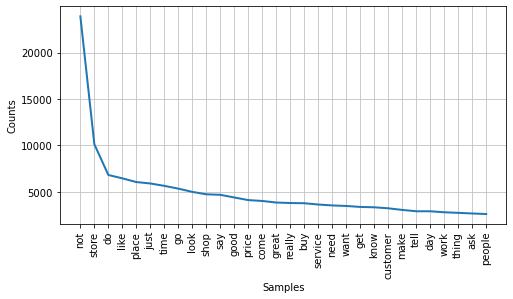

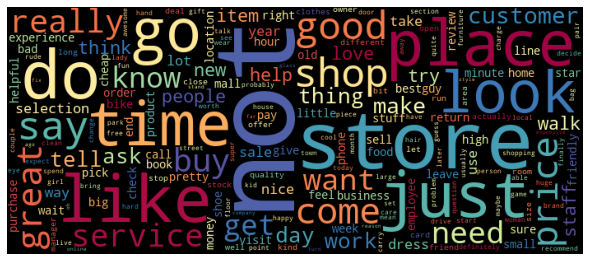

In [53]:
from wordcloud import WordCloud

all_clean_words = [word for sent in df.lemmatized for word in nltk.word_tokenize(sent)]

all_words_frequency = nltk.FreqDist(all_clean_words)

# print 10 most frequently occurring words
print(all_words_frequency.most_common(10))

plt.figure(figsize = (8, 4), facecolor = None) 

all_words_frequency.plot(30, cumulative=False)


plt.figure(figsize = (8, 8), facecolor = None) 
wcloud = WordCloud(width=700, height=300, colormap='Spectral').generate_from_frequencies(all_words_frequency)

# plot the wordcloud
plt.imshow(wcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

#### Positive & Negative

<Figure size 576x288 with 0 Axes>

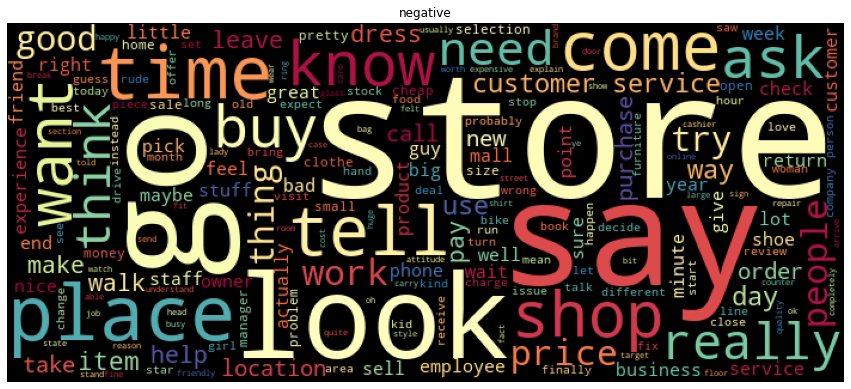

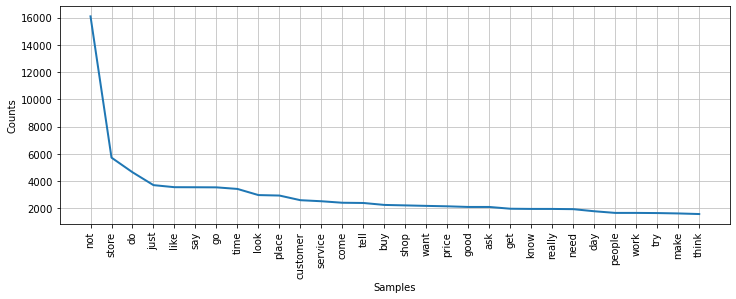

<Figure size 576x288 with 0 Axes>

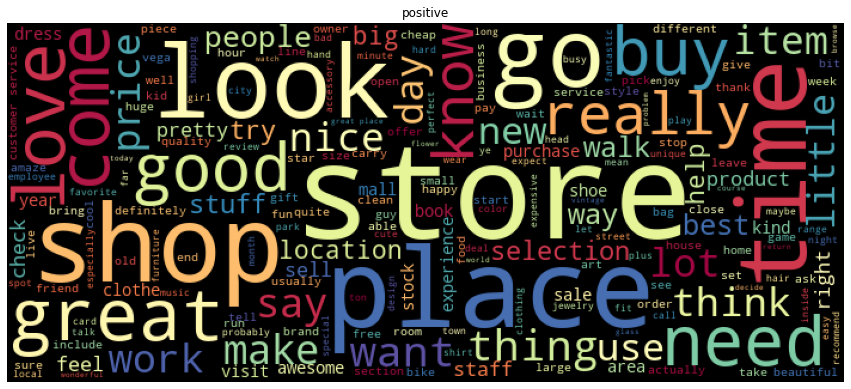

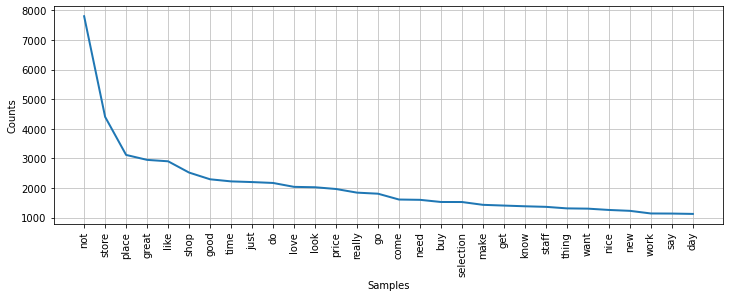

In [54]:
groupedSentiment = df.groupby('sentiment')

for name, sentiment in groupedSentiment:
    # Concatenate all string into 1.
    text = sentiment['lemmatized'].str.cat(sep=' ')
    all_clean_words = [word for sent in sentiment['lemmatized'] for word in nltk.word_tokenize(sent)]
    words_frequency = nltk.FreqDist(all_clean_words)
    
    wordcloud = WordCloud(width=700, height=300, colormap='Spectral').generate(text)
    
    plt.figure(figsize = (8, 4), facecolor = None) 
    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud)
    plt.title(name)
    plt.axis("off")
    plt.show()
    
    plt.figure(figsize = (12, 4), facecolor = None) 
    words_frequency.plot(30, cumulative=False)

## Modelling
Perform the necessary steps and explain the rationale taken here.

### Considerations:

1. **Feature Seperation**
    > Before building a model, it's important to separate the features (predictors) and the label (target) variables. This allows the model to be trained on the features and tested on the label.
    

2. **Split Train Test Vectorizer Function** (Choosen TF-IDF)
    - Splitting data into training and test sets allows the model to be trained on the training data and get evaluated on the test data. 
    - A function for train-test split can be created for mutiple runs in testing different feature selected in step 3.
    - Splitting it into **80% for training, 20% for testing.**
    - Vectorization will be included in this function too. (reduce repeated code)
    - Do not have enough computational power to perform **Bigram/Trigram**.
    - Note! When vectorizing text using **CountVectorizer/TfidfVectorizer**, the **fit_transform()** method is used to learn the vocabulary from the training data and then convert it into number. While **transform()** is used to convert the test data into numeric format with vocabulary learned from the training data.
    > Follow the sequence for normal sentiment analysis => Prevent data leakage which could lead to overfitting and poor generalization.
    > - Split Data
    > - Vectorize
    > - Feature Selection (If required)
    > - Build Model


3. **Simple Model Comparison**
    > Evaluate different models and select one that best fits the data and improves performance. This is done through training different models on the same vectorize data and comparing their performance using metrics such as accuracy, precision, recall, F1-score, and others.
    
    > **Models**
    > - Logistic Regression
    > - Support Vector Machine (LinearSVC)
    > - Naive Bayes
    > - Decision Tree
    > - Random Forest
    > - K-Nearest Neighbor

    **Confusion Matrix**
    
    > - TN / True Negative: when a case was negative and predicted negative
    > - TP / True Positive: when a case was positive and predicted positive
    > - FN / False Negative: when a case was positive but predicted negative
    > - FP / False Positive: when a case was negative but predicted positive

    **Classification Report**

    > **Accuracy** : Basically how well it can predict, first thing that I look at. The number of correct predictions divided by the total number of predictions.

    > **Precision** : The ability of a classification model to identify only the relevant data points. precision the number of true positives divided by the number of true positives plus the number of false positives.

    > **Recall / Sensitivity** : The ability of a model to find all the relevant cases within a data set. Define recall as the number of true positives divided by the number of true positives plus the number of false negatives

    > **F1-Score** : It is primarily used to compare the performance of two classifiers.It combines the precision and recall of a classifier into a single metric by taking their harmonic mean. (Second metric that I will look for.)

    > **support** : The number of actual occurrences of the class in the specified dataset.

4. **Feature Selection** (With top 3 models from basic modelling)
    
    *I am performing **feature selection** after building a simple model to determine whether it improves the accuracy of my model. If it does not lead to an improvement, I will stick to using the original data. This way, I can evaluate the impact of feature selection on the performance of my model and make an informed decision on whether or not to use it in my final model.*
    
    > **Removing Correlated Features** (performed)
    > - Aims to remove redundant or highly correlated features from the dataset to improve the model's performance. Correlated features are features that are related to each other, meaning they provide similar or redundant information. When a model is trained on correlated features, it tends to overfit and perform poorly on new unseen data.
    
    > **Removing Low-Variance Features** (Not the best will not be conducted as the variance for too small in this dataset)
    > - High variance means that the data is spread out over a large range of values, while low variance close to 0 it means that the data is concentrated around a relatively small range of values, it value is almost all identical.
    > - It is likely that with low variance it is not a good predictor, unless all output variable is the same/similar. Therefore, with a higher variance it can better explain what is going on with the data.
    
    > **Chi-Squared** (performed)
    > - Select the features that are most relevant to the target variable.
    > - The features with the highest chi-squared values are considered to be the most relevant.

7. **Hyperparameter Tuning**
    > - With top 3 models from basic modelling and feautures selected with specific technique.
    > - Search for the best parameter of hyperparameters for a machine learning model. Find the set of hyperparameters that result in the best performance on a given evaluation metric, such as accuracy or F1-score.
    > - Able to evaulate the best score for each model, and find the best after hyper-tuning.

In [55]:
# Show features/terms using TfidfVectorizer to have an overview
# on how data looks
corpus = df.lemmatized

vectorizer = TfidfVectorizer()

transform = vectorizer.fit_transform(corpus)

v_df = pd.DataFrame(transform.toarray(), columns=vectorizer.get_feature_names_out())

v_df

,ab,aback,abandon,abbey,abc,abdicated,abe,aber,abhor,abhorrent,...,zoo,zoom,zoot,zsa,zu,zucchini,zulu,zumba,zurich,zuzu
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11899,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11902,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Features Seperation

Sperate data into predictors and label.

- Testing the X with stemmed and lemmatized with model, lemmatized perform better.
- Therefore, I will be using lemmatized as the predictors.

In [56]:
# Features Selected
# With Lemmatization models perform better.
X = df.lemmatized
y = df.sentiment

In [57]:
def split_train_test_vect(X, y):
    # Split data into 80% training and testing 20%.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

    print("The size of original dataset: ", X.shape)
    print("The size of traning dataset: ", X_train.shape)
    print("The size of testing dataset: ", X_test.shape)
    
    ## TF-IDF is performing better after multiple testing.
    vectorizer = TfidfVectorizer(ngram_range = (1,1))
    X_train = vectorizer.fit_transform(X_train).toarray()
    X_test = vectorizer.transform(X_test).toarray()

    print('The diemnsions of training set: ', X_train.shape)
    print('The diemnsions of testing set: ', X_test.shape)
    
    return X_train, X_test, y_train, y_test

In [58]:
X_train, X_test, y_train, y_test = split_train_test_vect(X, y)

The size of original dataset:  (11904,)
The size of traning dataset:  (9523,)
The size of testing dataset:  (2381,)
The diemnsions of training set:  (9523, 17871)
The diemnsions of testing set:  (2381, 17871)


In [59]:
# For model ranking
models_performance = []

In [60]:
def build_model(model):
    
    name = str(model)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    cmVisual = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    cmVisual.plot()
    plt.title('Confusion Matrix')
    plt.show()
    
    models_performance.append({'Model': name,
                               'Accuracy': accuracy_score(y_test, y_pred),
                               'Precision Score': precision_score(y_test, y_pred, average='macro'),
                               'Recall': recall_score(y_test, y_pred, average='macro'),
                               'F1': f1_score(y_test, y_pred, average='macro')
                              })
    
    # Classification Report Data
    cr = classification_report(y_test, y_pred)
    print(cr)
    
    print('Accuracy: ', accuracy_score(y_test, y_pred))
    
    return model

### Base Model Comparison

With all default parameter.

#### Logistic Regression

Default: solver = 'lbfgs', I will use random_state only if solver is ‘sag’, ‘saga’ or ‘liblinear’

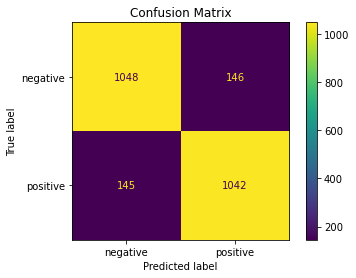

              precision    recall  f1-score   support

    negative       0.88      0.88      0.88      1194
    positive       0.88      0.88      0.88      1187

    accuracy                           0.88      2381
   macro avg       0.88      0.88      0.88      2381
weighted avg       0.88      0.88      0.88      2381

Accuracy:  0.877782444351113


LogisticRegression()

In [61]:
build_model(LogisticRegression())

#### Support Vector Machine

Default: dual=True, to control the randomness I will use random_state.

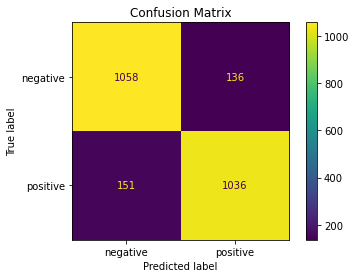

              precision    recall  f1-score   support

    negative       0.88      0.89      0.88      1194
    positive       0.88      0.87      0.88      1187

    accuracy                           0.88      2381
   macro avg       0.88      0.88      0.88      2381
weighted avg       0.88      0.88      0.88      2381

Accuracy:  0.879462410751785


LinearSVC(random_state=42)

In [62]:
build_model(LinearSVC(random_state=42))

#### Naive Baise

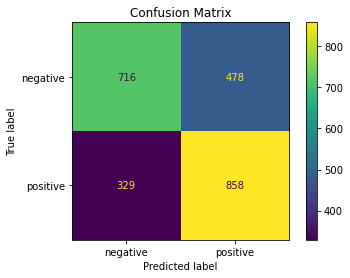

              precision    recall  f1-score   support

    negative       0.69      0.60      0.64      1194
    positive       0.64      0.72      0.68      1187

    accuracy                           0.66      2381
   macro avg       0.66      0.66      0.66      2381
weighted avg       0.66      0.66      0.66      2381

Accuracy:  0.6610667786644268


GaussianNB()

In [63]:
build_model(GaussianNB())

#### Random Forest

Default bootstrap=True, to control the randomness I will use random_state.

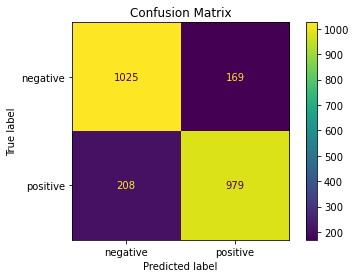

              precision    recall  f1-score   support

    negative       0.83      0.86      0.84      1194
    positive       0.85      0.82      0.84      1187

    accuracy                           0.84      2381
   macro avg       0.84      0.84      0.84      2381
weighted avg       0.84      0.84      0.84      2381

Accuracy:  0.8416631667366653


RandomForestClassifier(random_state=42)

In [64]:
build_model(RandomForestClassifier(random_state=42))

#### Decision Tree

In Decision Tree the features are always randomly permuted at each split, therefore I will use random_state to control the randomness

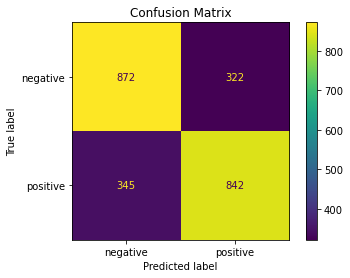

              precision    recall  f1-score   support

    negative       0.72      0.73      0.72      1194
    positive       0.72      0.71      0.72      1187

    accuracy                           0.72      2381
   macro avg       0.72      0.72      0.72      2381
weighted avg       0.72      0.72      0.72      2381

Accuracy:  0.7198656026879462


DecisionTreeClassifier(random_state=42)

In [65]:
build_model(DecisionTreeClassifier(random_state=42))

####  K-Nearest Neighbor (KNN)

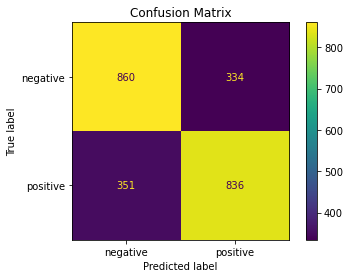

              precision    recall  f1-score   support

    negative       0.71      0.72      0.72      1194
    positive       0.71      0.70      0.71      1187

    accuracy                           0.71      2381
   macro avg       0.71      0.71      0.71      2381
weighted avg       0.71      0.71      0.71      2381

Accuracy:  0.7123057538849223


KNeighborsClassifier()

In [66]:
build_model(KNeighborsClassifier())

### Model Selection

#### Rank Machine Learning Model: Accuracy and F1 Score 

In [67]:
# View Model
models_performance

[{'Model': 'LogisticRegression()',
  'Accuracy': 0.877782444351113,
  'Precision Score': 0.8777810234222639,
  'Recall': 0.8777826227458551,
  'F1': 0.8777816682468634},
 {'Model': 'LinearSVC(random_state=42)',
  'Accuracy': 0.879462410751785,
  'Precision Score': 0.8795312178005121,
  'Recall': 0.8794428474865199,
  'F1': 0.8794521190746978},
 {'Model': 'GaussianNB()',
  'Accuracy': 0.6610667786644268,
  'Precision Score': 0.663691516488554,
  'Recall': 0.6612478285840886,
  'F1': 0.6598569622182486},
 {'Model': 'RandomForestClassifier(random_state=42)',
  'Accuracy': 0.8416631667366653,
  'Precision Score': 0.8420466073795253,
  'Recall': 0.8416136424893352,
  'F1': 0.8416040458475273},
 {'Model': 'DecisionTreeClassifier(random_state=42)',
  'Accuracy': 0.7198656026879462,
  'Precision Score': 0.7199418603009484,
  'Recall': 0.7198347818847114,
  'F1': 0.7198211232686709},
 {'Model': 'KNeighborsClassifier()',
  'Accuracy': 0.7123057538849223,
  'Precision Score': 0.712343404828954,
 

In [68]:
models_performance = sorted(models_performance, key=lambda x: (-x['Accuracy'], -x['F1']))

for i, model in enumerate(models_performance):
    print(f'{i+1}. {model["Model"]}, Accuracy: {model["Accuracy"]}, F1: {model["F1"]}\n')

1. LinearSVC(random_state=42), Accuracy: 0.879462410751785, F1: 0.8794521190746978

2. LogisticRegression(), Accuracy: 0.877782444351113, F1: 0.8777816682468634

3. RandomForestClassifier(random_state=42), Accuracy: 0.8416631667366653, F1: 0.8416040458475273

4. DecisionTreeClassifier(random_state=42), Accuracy: 0.7198656026879462, F1: 0.7198211232686709

5. KNeighborsClassifier(), Accuracy: 0.7123057538849223, F1: 0.7122765205073224

6. GaussianNB(), Accuracy: 0.6610667786644268, F1: 0.6598569622182486



### Deep Learning

Not enough memory to perform.

#### Load Pre-trained BERT model

In [69]:
# model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')

# # Load pretrained model/tokenizer
# tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
# model = model_class.from_pretrained(pretrained_weights)

In [70]:
# tokenizer.encode("a visually stunning rumination on love", add_special_tokens=True)

#### Tokenize X

In [71]:
# tokenized = X.apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))

In [72]:
# max_len = 0
# for i in tokenized.values:
#     if len(i) > max_len:
#         max_len = len(i)

# padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values])

# np.array(padded).shape

In [73]:
# attention_mask = np.where(padded != 0, 1, 0)
# attention_mask.shape

#### Build the model

Not enough memory to perform.

In [74]:
# # Not enough memory
# input_ids = torch.tensor(padded)  
# attention_mask = torch.tensor(attention_mask)

# with torch.no_grad():
#     last_hidden_states = model(input_ids, attention_mask=attention_mask)

In [75]:
# features = last_hidden_states[0][:,0,:].numpy()

### Feature Selection

Conducted with the top 3 best classification models identified above: 

Find the best feature selection techniques out of the 2 stated below:

- Chi Square
- Removal of Correlated Features

**What to perform:**

1. Choose the model.


2. Perform feature selection with Chi Square


3. With testing of k value in range of 100-17000+ increase 1000 per test.


4. Observe the lowest K(Number of Features) value, which give the best performance throughout multiple testing. (The performance must perform better than the original "all", then it will consider as improvement.)


5. Perform feature selection with Removal of Correlated Features


6. Repeat steps in 3 and 4.


7. Repeat the all steps above for each model.


8. Identify which feature selection techniques will help improve performance most.


**Things to take note:**
- Note that for the ***k-value*** is not fix, I will use the different k-value that perform the best for each model tested below during ***Model Selection***.
- For Feature Selection Technique, I will only choose 1.

In [85]:
models_performance = []

#### LinearSVC - Chi Square

The size of original dataset:  (11904,)
The size of traning dataset:  (9523,)
The size of testing dataset:  (2381,)
The diemnsions of training set:  (9523, 17871)
The diemnsions of testing set:  (2381, 17871)


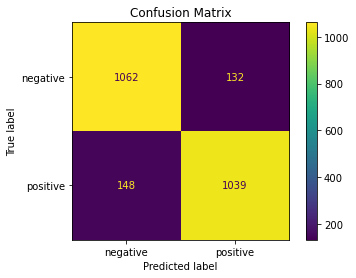

              precision    recall  f1-score   support

    negative       0.88      0.89      0.88      1194
    positive       0.89      0.88      0.88      1187

    accuracy                           0.88      2381
   macro avg       0.88      0.88      0.88      2381
weighted avg       0.88      0.88      0.88      2381

Accuracy:  0.8824023519529609


LinearSVC(random_state=42)

In [86]:
# for i in range(17000, 1000, -1000):
#     print(i)

X_train, X_test, y_train, y_test = split_train_test_vect(X, y)

# With testing of k value in range of 1000-max(17000+) increase 1000 per test
# With k=9000, it return a small improvement.
selector = SelectKBest(score_func=chi2, k=5000)
selector.fit(X_train, y_train)

top_k_indices = selector.get_support(indices=True)

# Update X train and test
X_train = X_train[:, top_k_indices]
X_test = X_test[:, top_k_indices]

model = LinearSVC(random_state=42)

build_model(model)

#### LinearSVC - Removing Correlated Features

The size of original dataset:  (11904,)
The size of traning dataset:  (9523,)
The size of testing dataset:  (2381,)
The diemnsions of training set:  (9523, 17871)
The diemnsions of testing set:  (2381, 17871)


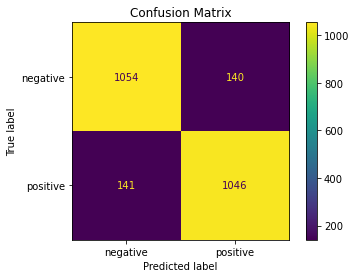

              precision    recall  f1-score   support

    negative       0.88      0.88      0.88      1194
    positive       0.88      0.88      0.88      1187

    accuracy                           0.88      2381
   macro avg       0.88      0.88      0.88      2381
weighted avg       0.88      0.88      0.88      2381

Accuracy:  0.881982360352793


LinearSVC(random_state=42)

In [87]:
# for i in range(17000, 1000, -1000):
#     print(i)

X_train, X_test, y_train, y_test = split_train_test_vect(X, y)

# With testing of k value in range of 1000-max(17000+) increase 1000 per test
selector = SelectKBest(f_classif, k=7000)
selector.fit(X_train, y_train)

top_k_indices = selector.get_support(indices=True)

# Update X train and test
X_train = X_train[:, top_k_indices]
X_test = X_test[:, top_k_indices]

model = LinearSVC(random_state=42)

build_model(model)

#### Logistic Regression - Chi Square

The size of original dataset:  (11904,)
The size of traning dataset:  (9523,)
The size of testing dataset:  (2381,)
The diemnsions of training set:  (9523, 17871)
The diemnsions of testing set:  (2381, 17871)


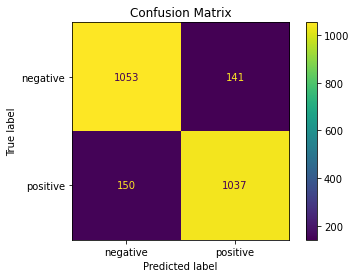

              precision    recall  f1-score   support

    negative       0.88      0.88      0.88      1194
    positive       0.88      0.87      0.88      1187

    accuracy                           0.88      2381
   macro avg       0.88      0.88      0.88      2381
weighted avg       0.88      0.88      0.88      2381

Accuracy:  0.877782444351113


LogisticRegression()

In [88]:
# for i in range(17000, 1000, -1000):
#     print(i)

X_train, X_test, y_train, y_test = split_train_test_vect(X, y)

# With testing of k value in range of 1000-max(17000+) increase 1000 per test
selector = SelectKBest(score_func=chi2, k=13000)
selector.fit(X_train, y_train)

top_k_indices = selector.get_support(indices=True)

# Update X train and test
X_train = X_train[:, top_k_indices]
X_test = X_test[:, top_k_indices]

model = LogisticRegression()

build_model(model)

#### Logistic Regression - Removing Correlated Features

The size of original dataset:  (11904,)
The size of traning dataset:  (9523,)
The size of testing dataset:  (2381,)
The diemnsions of training set:  (9523, 17871)
The diemnsions of testing set:  (2381, 17871)


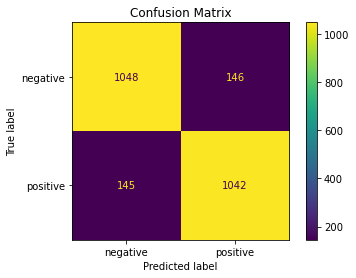

              precision    recall  f1-score   support

    negative       0.88      0.88      0.88      1194
    positive       0.88      0.88      0.88      1187

    accuracy                           0.88      2381
   macro avg       0.88      0.88      0.88      2381
weighted avg       0.88      0.88      0.88      2381

Accuracy:  0.877782444351113


LogisticRegression()

In [89]:
# for i in range(17000, 1000, -1000):
#     print(i)

X_train, X_test, y_train, y_test = split_train_test_vect(X, y)

# With testing of k value in range of 1000-max(17000+) increase 1000 per test
# All perform not as good as selecting all features

selector = SelectKBest(f_classif, k="all")
selector.fit(X_train, y_train)

top_k_indices = selector.get_support(indices=True)

# Update X train and test
X_train = X_train[:, top_k_indices]
X_test = X_test[:, top_k_indices]

model = LogisticRegression()

build_model(model)

#### Random Forest - Chi Square

The size of original dataset:  (11904,)
The size of traning dataset:  (9523,)
The size of testing dataset:  (2381,)
The diemnsions of training set:  (9523, 17871)
The diemnsions of testing set:  (2381, 17871)


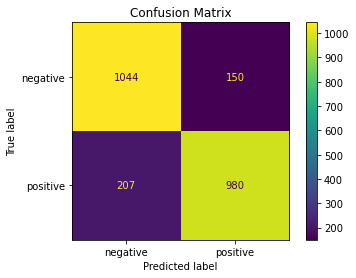

              precision    recall  f1-score   support

    negative       0.83      0.87      0.85      1194
    positive       0.87      0.83      0.85      1187

    accuracy                           0.85      2381
   macro avg       0.85      0.85      0.85      2381
weighted avg       0.85      0.85      0.85      2381

Accuracy:  0.8500629987400252


RandomForestClassifier(random_state=42)

In [91]:
# Code below is used to generate multiple testing automatically.
# for i in range(17000, 1000, -1000):
#     print(i)

X_train, X_test, y_train, y_test = split_train_test_vect(X, y)

# With testing of k value in range of 1000-max(17000+) increase 1000 per test
# Same result at 7000
selector = SelectKBest(score_func=chi2, k=12000)
selector.fit(X_train, y_train)

top_k_indices = selector.get_support(indices=True)

# Update X train and test
X_train = X_train[:, top_k_indices]
X_test = X_test[:, top_k_indices]

model = RandomForestClassifier(random_state=42)

build_model(model)

#### Random Forest - Removing Correlated Features

The size of original dataset:  (11904,)
The size of traning dataset:  (9523,)
The size of testing dataset:  (2381,)
The diemnsions of training set:  (9523, 17871)
The diemnsions of testing set:  (2381, 17871)


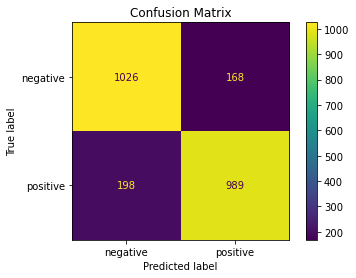

              precision    recall  f1-score   support

    negative       0.84      0.86      0.85      1194
    positive       0.85      0.83      0.84      1187

    accuracy                           0.85      2381
   macro avg       0.85      0.85      0.85      2381
weighted avg       0.85      0.85      0.85      2381

Accuracy:  0.8462830743385132


RandomForestClassifier(random_state=42)

In [94]:
# Code below is used to generate multiple testing automatically.

X_train, X_test, y_train, y_test = split_train_test_vect(X, y)

# With testing of k value in range of 1000-max(17000+) increase 1000 per test
selector = SelectKBest(f_classif, k=11000)
selector.fit(X_train, y_train)

top_k_indices = selector.get_support(indices=True)


X_train = X_train[:, top_k_indices]
X_test = X_test[:, top_k_indices]

model = RandomForestClassifier(random_state=42)

build_model(model)

In [95]:
models_performance

[{'Model': 'LinearSVC(random_state=42)',
  'Accuracy': 0.8824023519529609,
  'Precision Score': 0.882480891517457,
  'Recall': 0.882381579337293,
  'F1': 0.8823913776727789},
 {'Model': 'LinearSVC(random_state=42)',
  'Accuracy': 0.881982360352793,
  'Precision Score': 0.8819822616720878,
  'Recall': 0.8819801055262271,
  'F1': 0.8819810280191007},
 {'Model': 'LogisticRegression()',
  'Accuracy': 0.877782444351113,
  'Precision Score': 0.8778086617073615,
  'Recall': 0.8777702751330367,
  'F1': 0.87777692517338},
 {'Model': 'LogisticRegression()',
  'Accuracy': 0.877782444351113,
  'Precision Score': 0.8777810234222639,
  'Recall': 0.8777826227458551,
  'F1': 0.8777816682468634},
 {'Model': 'RandomForestClassifier(random_state=42)',
  'Accuracy': 0.8500629987400252,
  'Precision Score': 0.8508945056344306,
  'Recall': 0.8499913213921334,
  'F1': 0.8499545901062036},
 {'Model': 'RandomForestClassifier(random_state=42)',
  'Accuracy': 0.8462830743385132,
  'Precision Score': 0.8465160913

#### Selected Feature Selection Technique: Chi Square

##### For Support Vector Machine

In [96]:
X_train, X_test, y_train, y_test = split_train_test_vect(X, y)

selector = SelectKBest(chi2, k=5000)
selector.fit(X_train, y_train)

top_k_indices = selector.get_support(indices=True)

# Update X train and test
X_train_svm = X_train[:, top_k_indices]
X_test_svm = X_test[:, top_k_indices]

The size of original dataset:  (11904,)
The size of traning dataset:  (9523,)
The size of testing dataset:  (2381,)
The diemnsions of training set:  (9523, 17871)
The diemnsions of testing set:  (2381, 17871)


##### For Logistic Regression

In [97]:
X_train, X_test, y_train, y_test = split_train_test_vect(X, y)

selector = SelectKBest(chi2, k=13000)
selector.fit(X_train, y_train)

top_k_indices = selector.get_support(indices=True)

# Update X train and test
X_train_lr = X_train[:, top_k_indices]
X_test_lr = X_test[:, top_k_indices]

The size of original dataset:  (11904,)
The size of traning dataset:  (9523,)
The size of testing dataset:  (2381,)
The diemnsions of training set:  (9523, 17871)
The diemnsions of testing set:  (2381, 17871)


##### For Random Forest

In [98]:
X_train, X_test, y_train, y_test = split_train_test_vect(X, y)

selector = SelectKBest(chi2, k=12000)
selector.fit(X_train, y_train)

top_k_indices = selector.get_support(indices=True)

# Update X train and test
X_train_rf = X_train[:, top_k_indices]
X_test_rf = X_test[:, top_k_indices]

The size of original dataset:  (11904,)
The size of traning dataset:  (9523,)
The size of testing dataset:  (2381,)
The diemnsions of training set:  (9523, 17871)
The diemnsions of testing set:  (2381, 17871)


### Model Selection with Hyperparameter Tuning

**Top 3 models will be selected for further parameter tuning with features selected**

In [99]:
models_performance = []

#### Support Vector Machine
As the dataset is more than tens of thousands of samples, I will not consider to use SVC.

LinearSVC has more flexibility in the choice of penalties and loss functions. It also scales better to large number of samples.

In [100]:
X_train, X_test, y_train, y_test = split_train_test_vect(X, y)

X_train = X_train_svm
X_test = X_test_svm

The size of original dataset:  (11904,)
The size of traning dataset:  (9523,)
The size of testing dataset:  (2381,)
The diemnsions of training set:  (9523, 17871)
The diemnsions of testing set:  (2381, 17871)


In [101]:
parameters = {'C': [0.1, 0.5, 1, 2], 
              'loss': ['hinge', 'squared_hinge'], 
              'penalty': ['l1', 'l2']}

# cv parameter can be used for number of folds to use for cross-validation.
grid_search = GridSearchCV(LinearSVC(random_state=42), parameters, cv=5, verbose=True)
grid_search.fit(X_train, y_train)

print('best parameters: ', grid_search.best_params_)
print('best scrores: ', grid_search.best_score_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
best parameters:  {'C': 0.5, 'loss': 'squared_hinge', 'penalty': 'l2'}
best scrores:  0.8842811376519112


best parameters:  {'C': 1, 'loss': 'squared_hinge', 'penalty': 'l2'}

best scrores:  0.8818774123822758

**I perform futher testing on the C value from range or 0.5 - 1** After Grid Search

Update: best parameters:  {'C': 0.6, 'loss': 'squared_hinge', 'penalty': 'l2'}

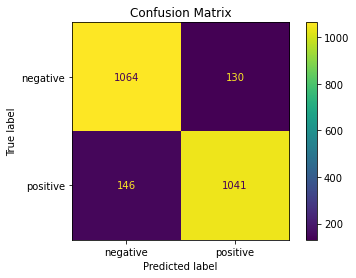

              precision    recall  f1-score   support

    negative       0.88      0.89      0.89      1194
    positive       0.89      0.88      0.88      1187

    accuracy                           0.88      2381
   macro avg       0.88      0.88      0.88      2381
weighted avg       0.88      0.88      0.88      2381

Accuracy:  0.8840823183536329


LinearSVC(C=0.7, random_state=42)

In [117]:
build_model(LinearSVC(C= 0.7, loss= 'squared_hinge', penalty= 'l2', random_state=42))

#### Logistic Regression

****Parameters***
- penalty: controls the regularization term to prevent overfitting by adding a penalty term, 'l1'=> Lasso regularization while 'l2'=> Ridge regularization.

- C: Inverse of the regularization strength, large regularization strength and a large value for C means a small regularization strength

- solver:  Algorithm used to optimize the training/learning
    > For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones;

In [103]:
X_train, X_test, y_train, y_test = split_train_test_vect(X, y)

X_train = X_train_lr
X_test = X_test_lr

The size of original dataset:  (11904,)
The size of traning dataset:  (9523,)
The size of testing dataset:  (2381,)
The diemnsions of training set:  (9523, 17871)
The diemnsions of testing set:  (2381, 17871)


In [104]:
parameters = {'penalty': ['l1', 'l2'],
              'C': [1, 2],
              'solver': ['lbfgs', 'sag', 'saga'],
             }

# cv parameter can be used for number of folds to use for cross-validation.
grid_search = GridSearchCV(LogisticRegression(), parameters, cv=5, verbose=True)
grid_search.fit(X_train, y_train)

print('best parameters: ', grid_search.best_params_)
print('best scrores: ', grid_search.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
best parameters:  {'C': 2, 'penalty': 'l2', 'solver': 'lbfgs'}
best scrores:  0.8769305675025917


best parameters:  {C= 2, penalty= 'l2', solver= 'lbfgs'}

best scrores: 0.8644055039855618

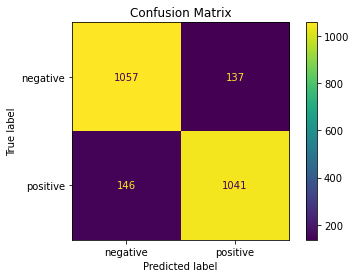

              precision    recall  f1-score   support

    negative       0.88      0.89      0.88      1194
    positive       0.88      0.88      0.88      1187

    accuracy                           0.88      2381
   macro avg       0.88      0.88      0.88      2381
weighted avg       0.88      0.88      0.88      2381

Accuracy:  0.8811423771524569


LogisticRegression(C=2)

In [105]:
build_model(LogisticRegression(C= 2, penalty= 'l2', solver= 'lbfgs'))

#### Random Forest
***Parameters:***

- n_estimators: The number of trees in the forest

- criterion: The function to measure the quality of a split. {“gini”, “entropy”, “log_loss”}



In [106]:
X_train, X_test, y_train, y_test = split_train_test_vect(X, y)
X_train = X_train_rf
X_test = X_test_rf

The size of original dataset:  (11904,)
The size of traning dataset:  (9523,)
The size of testing dataset:  (2381,)
The diemnsions of training set:  (9523, 17871)
The diemnsions of testing set:  (2381, 17871)


In [107]:
parameters = {'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 170, num = 10)],
              'max_depth': [4,7],
              'min_samples_split': [ 5, 7],
              'min_samples_leaf': [1]
             }

# cv parameter can be used for number of folds to use for cross-validation.
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), parameters, cv=5, verbose=True)
grid_search.fit(X_train, y_train)

print('best parameters: ', grid_search.best_params_)
print('best scrores: ', grid_search.best_score_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
best parameters:  {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 154}
best scrores:  0.7839967246741215


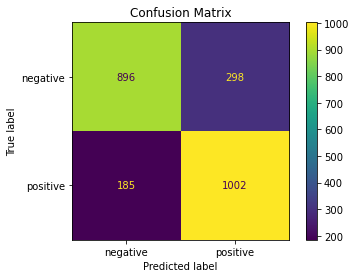

              precision    recall  f1-score   support

    negative       0.83      0.75      0.79      1194
    positive       0.77      0.84      0.81      1187

    accuracy                           0.80      2381
   macro avg       0.80      0.80      0.80      2381
weighted avg       0.80      0.80      0.80      2381

Accuracy:  0.7971440571188576


RandomForestClassifier(max_depth=7, min_samples_split=5, n_estimators=115,
                       random_state=42)

In [108]:
build_model(RandomForestClassifier(max_depth= 7, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 5, n_estimators= 115, random_state=42))

In [109]:
models_performance

[{'Model': 'LinearSVC(C=0.6, random_state=42)',
  'Accuracy': 0.881562368752625,
  'Precision Score': 0.8815947690648842,
  'Recall': 0.8815489974443969,
  'F1': 0.8815563307832669},
 {'Model': 'LogisticRegression(C=2)',
  'Accuracy': 0.8811423771524569,
  'Precision Score': 0.8811689649673213,
  'Recall': 0.8811302369753852,
  'F1': 0.881137009704696},
 {'Model': 'RandomForestClassifier(max_depth=7, min_samples_split=5, n_estimators=115,\n                       random_state=42)',
  'Accuracy': 0.7971440571188576,
  'Precision Score': 0.7998156977157902,
  'Recall': 0.7972818317930568,
  'F1': 0.7967412081284215}]

In [110]:
models_performance = sorted(models_performance, key=lambda x: (-x['Accuracy'], -x['F1']))

for i, model in enumerate(models_performance):
    print(f'{i+1}. {model["Model"]}, Accuracy: {model["Accuracy"]}, F1: {model["F1"]}\n')

1. LinearSVC(C=0.6, random_state=42), Accuracy: 0.881562368752625, F1: 0.8815563307832669

2. LogisticRegression(C=2), Accuracy: 0.8811423771524569, F1: 0.881137009704696

3. RandomForestClassifier(max_depth=7, min_samples_split=5, n_estimators=115,
                       random_state=42), Accuracy: 0.7971440571188576, F1: 0.7967412081284215



## Evaluation
Perform the necessary steps and explain the rationale taken here.

Select a final best model after:
- Conduct Basic Modelling
- Identify top 3 models based on Accuracy and F1 Scores
- Futher feature selection techniques (Chi Square / Removal of Correlated Featuers) conducted on the top 3 models
- Test the k value for each models in each feature selection techniques, from range of 1000-17000.
- Found that most model performance improved with Chi Square Feature Selection.
- Store the best features selected for each models
- Use the features selected for hyperparameter tuning for that 3 models with GridSearchCV
- Conclude that Support Vector Machine perform the best.

**Model Selected:** Support Vector Machine ( LinearSVC() )

**Feature Selection Method:** Chi Square Feature Selection (k = 5000)

**Best Parameter:**
~~~Python
LinearSVC(C= 0.7, loss= 'squared_hinge', penalty= 'l2', random_state=42)
~~~


During  model testing phase, it was observed that the **Support Vector Machine (LinearSVC) model always performed the most effectively** among the models that were tested. This model was chosen as the final model due to its exceptional performance in terms of both **accuracy and F1 scores**. 

These two metrics are commonly used to evaluate the performance of a classification model and are considered to be important indicators of the model's **ability to correctly classify target variable**. The **accuracy is the proportion of correctly classified instances**, while the **F1 score is a measure of the balance between precision and recall**. The high values of these two metrics in the case of the LinearSVC model indicate that it is **able to accurately and consistently identify the correct class**. 

In [111]:
X_train, X_test, y_train, y_test = split_train_test_vect(X, y)

# Features selected
X_train = X_train_svm
X_test = X_test_svm

The size of original dataset:  (11904,)
The size of traning dataset:  (9523,)
The size of testing dataset:  (2381,)
The diemnsions of training set:  (9523, 17871)
The diemnsions of testing set:  (2381, 17871)


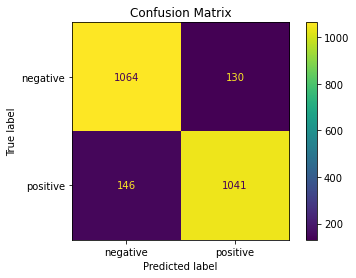

              precision    recall  f1-score   support

    negative       0.88      0.89      0.89      1194
    positive       0.89      0.88      0.88      1187

    accuracy                           0.88      2381
   macro avg       0.88      0.88      0.88      2381
weighted avg       0.88      0.88      0.88      2381

Accuracy:  0.8840823183536329


LinearSVC(C=0.7, random_state=42)

In [118]:
build_model(LinearSVC(C= 0.7, loss= 'squared_hinge', penalty= 'l2', random_state=42))

## Submission
Export your completed work as HTML. Select **File** > **Download as** > **HTML (.html)**.